In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-patient-precondition-dataset/covid.csv
/kaggle/input/covid19-patient-precondition-dataset/Description.xlsx
/kaggle/input/covid19-patient-precondition-dataset/Catalogs.xlsx


In [2]:
df=pd.read_csv('/kaggle/input/covid19-patient-precondition-dataset/covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
df.tail()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,2,3,97
566601,0021c9,2,1,16-05-2020,16-05-2020,9999-99-99,97,1,65,97,...,2,1,2,2,1,2,2,2,3,97


In [4]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [6]:
for i in df:
    df[i]=np.where(df[i]==97,np.NAN,df[i])
    df[i]=np.where(df[i]==98,np.NAN,df[i])
    df[i]=np.where(df[i]==99,np.NAN,df[i])
    

In [7]:
df.isnull().sum().sort_values(ascending=True)

id                          0
sex                         0
patient_type                0
entry_date                  0
date_symptoms               0
date_died                   0
covid_res                   0
pneumonia                  11
age                       207
copd                     1749
asthma                   1752
obesity                  1781
renal_chronic            1792
cardiovascular           1822
hypertension             1824
tobacco                  1907
inmsupr                  1980
diabetes                 1981
other_disease            2598
contact_other_covid    175031
pregnancy              288699
intubed                444813
icu                    444814
dtype: int64

In [8]:
 df.dtypes
    

id                      object
sex                    float64
patient_type           float64
entry_date              object
date_symptoms           object
date_died               object
intubed                float64
pneumonia              float64
age                    float64
pregnancy              float64
diabetes               float64
copd                   float64
asthma                 float64
inmsupr                float64
hypertension           float64
other_disease          float64
cardiovascular         float64
obesity                float64
renal_chronic          float64
tobacco                float64
contact_other_covid    float64
covid_res              float64
icu                    float64
dtype: object

In [9]:
#IMMPUTE NAN
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)


In [10]:
median=df.pneumonia.median()
impute_nan(df,'pneumonia',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,...,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0


In [11]:
df=df.drop(['pneumonia'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0


In [12]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu',
       'pneumonia_median'],
      dtype='object')

In [13]:
median=df.copd.median()
impute_nan(df,'copd',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0


In [14]:
df=df.drop(['copd'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0


In [15]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'diabetes', 'asthma', 'inmsupr',
       'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu',
       'pneumonia_median', 'copd_median'],
      dtype='object')

In [16]:
median=df.asthma.median()
impute_nan(df,'asthma',median)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,1.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0


In [17]:
df=df.drop(['asthma'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,1.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0


In [18]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'diabetes', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu',
       'pneumonia_median', 'copd_median', 'asthma_median'],
      dtype='object')

In [19]:
median=df.obesity.median()
impute_nan(df,'obesity',median)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0


In [20]:
df=df.drop(['obesity'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0


In [21]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'diabetes', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res', 'icu', 'pneumonia_median',
       'copd_median', 'asthma_median', 'obesity_median'],
      dtype='object')

In [22]:
median=df.diabetes.median()
impute_nan(df,'diabetes',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,diabetes,...,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,1.0,...,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0


In [23]:
df=df.drop(['diabetes'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,renal_chronic,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0


In [24]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res', 'icu', 'pneumonia_median',
       'copd_median', 'asthma_median', 'obesity_median', 'diabetes_median'],
      dtype='object')

In [25]:
median=df.hypertension.median()
impute_nan(df,'hypertension',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0


In [26]:
df=df.drop(['hypertension'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0


In [27]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'inmsupr', 'other_disease',
       'cardiovascular', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'pneumonia_median', 'copd_median', 'asthma_median',
       'obesity_median', 'diabetes_median', 'hypertension_median'],
      dtype='object')

In [28]:
df.isnull().sum().sort_values()

id                          0
obesity_median              0
asthma_median               0
copd_median                 0
pneumonia_median            0
covid_res                   0
diabetes_median             0
hypertension_median         0
date_died                   0
date_symptoms               0
entry_date                  0
patient_type                0
sex                         0
age                       207
renal_chronic            1792
cardiovascular           1822
tobacco                  1907
inmsupr                  1980
other_disease            2598
contact_other_covid    175031
pregnancy              288699
intubed                444813
icu                    444814
dtype: int64

In [29]:
median=df.tobacco.median()
impute_nan(df,'tobacco',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [30]:
df=df.drop(['tobacco'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,contact_other_covid,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [31]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'inmsupr', 'other_disease',
       'cardiovascular', 'renal_chronic', 'contact_other_covid', 'covid_res',
       'icu', 'pneumonia_median', 'copd_median', 'asthma_median',
       'obesity_median', 'diabetes_median', 'hypertension_median',
       'tobacco_median'],
      dtype='object')

In [32]:
median=df.cardiovascular.median()
impute_nan(df,'cardiovascular',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0


In [33]:
df=df.drop(['cardiovascular'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,covid_res,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0


In [34]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'inmsupr', 'other_disease',
       'renal_chronic', 'contact_other_covid', 'covid_res', 'icu',
       'pneumonia_median', 'copd_median', 'asthma_median', 'obesity_median',
       'diabetes_median', 'hypertension_median', 'tobacco_median',
       'cardiovascular_median'],
      dtype='object')

In [35]:
df.isnull().sum().sort_values()

id                            0
hypertension_median           0
diabetes_median               0
obesity_median                0
asthma_median                 0
copd_median                   0
pneumonia_median              0
covid_res                     0
tobacco_median                0
cardiovascular_median         0
date_died                     0
date_symptoms                 0
entry_date                    0
patient_type                  0
sex                           0
age                         207
renal_chronic              1792
inmsupr                    1980
other_disease              2598
contact_other_covid      175031
pregnancy                288699
intubed                  444813
icu                      444814
dtype: int64

In [36]:
median=df.icu.median()
impute_nan(df,'icu',median)
df.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,icu,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0


In [37]:
df=df.drop(['icu'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,covid_res,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0


In [38]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'age', 'pregnancy', 'inmsupr', 'other_disease',
       'renal_chronic', 'contact_other_covid', 'covid_res', 'pneumonia_median',
       'copd_median', 'asthma_median', 'obesity_median', 'diabetes_median',
       'hypertension_median', 'tobacco_median', 'cardiovascular_median',
       'icu_median'],
      dtype='object')

In [39]:
df.isnull().sum().sort_values()

id                            0
tobacco_median                0
hypertension_median           0
diabetes_median               0
obesity_median                0
asthma_median                 0
copd_median                   0
pneumonia_median              0
covid_res                     0
cardiovascular_median         0
icu_median                    0
date_died                     0
date_symptoms                 0
entry_date                    0
patient_type                  0
sex                           0
age                         207
renal_chronic              1792
inmsupr                    1980
other_disease              2598
contact_other_covid      175031
pregnancy                288699
intubed                  444813
dtype: int64

In [40]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,covid_res,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0


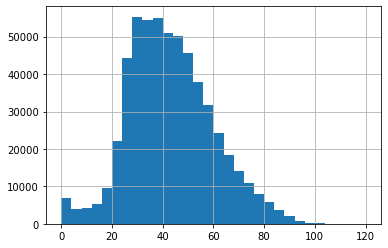

In [41]:
df.age.hist(bins=30)

In [42]:
def impute_nans(df,variable,median,extr):
    df[variable+'end']=df[variable].fillna(extr)
    df[variable].fillna(median,inplace=True)

In [43]:
extr=df.age.mean()+3*df.age.std()
extr

92.49076499531458

In [44]:
median=df.age.median()
median

41.0

In [45]:
impute_nans(df,'age',median,extr)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,age,pregnancy,inmsupr,...,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,27.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,24.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,54.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,30.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,60.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0


In [46]:
df=df.drop(['age'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,inmsupr,other_disease,...,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0


In [47]:
df.isnull().sum().sort_values()

id                            0
cardiovascular_median         0
tobacco_median                0
hypertension_median           0
diabetes_median               0
obesity_median                0
asthma_median                 0
copd_median                   0
pneumonia_median              0
covid_res                     0
icu_median                    0
ageend                        0
date_died                     0
date_symptoms                 0
entry_date                    0
patient_type                  0
sex                           0
renal_chronic              1792
inmsupr                    1980
other_disease              2598
contact_other_covid      175031
pregnancy                288699
intubed                  444813
dtype: int64

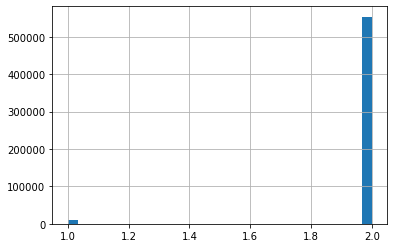

In [48]:
df.renal_chronic.hist(bins=30)

In [49]:
extr=df.renal_chronic.mean()+3*df.renal_chronic.std()
extr

2.3992399073881066

In [50]:
median=df.renal_chronic.median()
median

2.0

In [51]:
impute_nans(df,'renal_chronic',median,extr)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,inmsupr,other_disease,...,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0


In [52]:
df=df.drop(['renal_chronic'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,inmsupr,other_disease,...,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0


In [53]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pregnancy', 'inmsupr', 'other_disease',
       'contact_other_covid', 'covid_res', 'pneumonia_median', 'copd_median',
       'asthma_median', 'obesity_median', 'diabetes_median',
       'hypertension_median', 'tobacco_median', 'cardiovascular_median',
       'icu_median', 'ageend', 'renal_chronicend'],
      dtype='object')

In [54]:
df.isnull().sum().sort_values()

id                            0
icu_median                    0
cardiovascular_median         0
tobacco_median                0
hypertension_median           0
diabetes_median               0
obesity_median                0
asthma_median                 0
copd_median                   0
pneumonia_median              0
ageend                        0
covid_res                     0
date_died                     0
date_symptoms                 0
entry_date                    0
patient_type                  0
sex                           0
renal_chronicend              0
inmsupr                    1980
other_disease              2598
contact_other_covid      175031
pregnancy                288699
intubed                  444813
dtype: int64

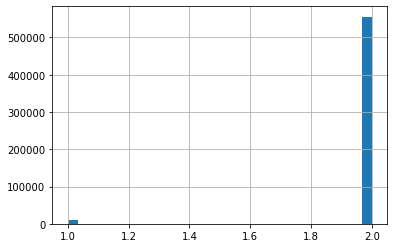

In [55]:
df.inmsupr.hist(bins=30)

In [56]:
extr=df.inmsupr.mean()+3*df.inmsupr.std()
extr

2.3593761051793045

In [57]:
median=df.inmsupr.median()
median

2.0

In [58]:
impute_nans(df,'inmsupr',median,extr)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,inmsupr,other_disease,...,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0


In [59]:
df=df.drop(['inmsupr'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,other_disease,contact_other_covid,...,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,2.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,2.0,NaN,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,2.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,2.0,NaN,...,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0


In [60]:
df.isnull().sum().sort_values()

id                            0
ageend                        0
icu_median                    0
cardiovascular_median         0
tobacco_median                0
hypertension_median           0
diabetes_median               0
obesity_median                0
asthma_median                 0
copd_median                   0
renal_chronicend              0
pneumonia_median              0
date_died                     0
date_symptoms                 0
entry_date                    0
patient_type                  0
sex                           0
covid_res                     0
inmsuprend                    0
other_disease              2598
contact_other_covid      175031
pregnancy                288699
intubed                  444813
dtype: int64

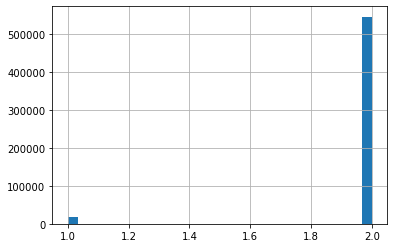

In [61]:
df.other_disease.hist(bins=30)

In [62]:
extr=df.other_disease.mean()+3*df.other_disease.std()
extr

2.4838668925037304

In [63]:
median=df.other_disease.median()
median

2.0

In [64]:
impute_nans(df,'other_disease',extr,median)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,other_disease,contact_other_covid,...,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,2.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,2.0,NaN,...,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,2.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,2.0,NaN,...,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0


In [65]:
df=df.drop(['other_disease'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,contact_other_covid,covid_res,...,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,NaN,1.0,...,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0


In [66]:
df.isnull().sum().sort_values()

id                            0
renal_chronicend              0
ageend                        0
icu_median                    0
cardiovascular_median         0
tobacco_median                0
hypertension_median           0
diabetes_median               0
obesity_median                0
asthma_median                 0
inmsuprend                    0
copd_median                   0
covid_res                     0
date_died                     0
date_symptoms                 0
entry_date                    0
patient_type                  0
sex                           0
pneumonia_median              0
other_diseaseend              0
contact_other_covid      175031
pregnancy                288699
intubed                  444813
dtype: int64

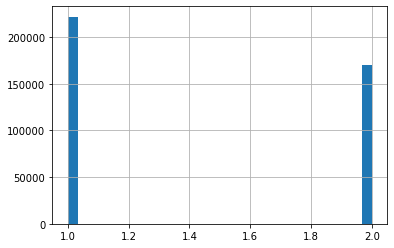

In [67]:
df.contact_other_covid.hist(bins=30)

In [68]:
extr=df.contact_other_covid.mean()+3*df.contact_other_covid.std()
extr

2.920025376428547

In [69]:
median=df.contact_other_covid.median()
median

1.0

In [70]:
impute_nans(df,'contact_other_covid',median,extr)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,contact_other_covid,covid_res,...,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025


In [71]:
df=df.drop(['contact_other_covid'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,covid_res,pneumonia_median,...,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025


In [72]:
df.isnull().sum().sort_values()

id                             0
inmsuprend                     0
renal_chronicend               0
ageend                         0
icu_median                     0
cardiovascular_median          0
tobacco_median                 0
hypertension_median            0
diabetes_median                0
obesity_median                 0
other_diseaseend               0
asthma_median                  0
pneumonia_median               0
covid_res                      0
date_died                      0
date_symptoms                  0
entry_date                     0
patient_type                   0
sex                            0
copd_median                    0
contact_other_covidend         0
pregnancy                 288699
intubed                   444813
dtype: int64

In [73]:
def impute_nan1(df,variable):
    df[variable+'_new']=np.where(df[variable].isnull(),0,df[variable])

In [74]:
impute_nan1(df,'pregnancy')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pregnancy,covid_res,pneumonia_median,...,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,1.0,2.0,...,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025,2.0


In [75]:
df=df.drop(['pregnancy'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,covid_res,pneumonia_median,copd_median,...,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,1.0,2.0,2.0,...,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025,2.0


In [76]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'covid_res', 'pneumonia_median', 'copd_median',
       'asthma_median', 'obesity_median', 'diabetes_median',
       'hypertension_median', 'tobacco_median', 'cardiovascular_median',
       'icu_median', 'ageend', 'renal_chronicend', 'inmsuprend',
       'other_diseaseend', 'contact_other_covidend', 'pregnancy_new'],
      dtype='object')

In [77]:
df.isnull().sum()

id                             0
sex                            0
patient_type                   0
entry_date                     0
date_symptoms                  0
date_died                      0
intubed                   444813
covid_res                      0
pneumonia_median               0
copd_median                    0
asthma_median                  0
obesity_median                 0
diabetes_median                0
hypertension_median            0
tobacco_median                 0
cardiovascular_median          0
icu_median                     0
ageend                         0
renal_chronicend               0
inmsuprend                     0
other_diseaseend               0
contact_other_covidend         0
pregnancy_new                  0
dtype: int64

In [78]:
df.dtypes

id                         object
sex                       float64
patient_type              float64
entry_date                 object
date_symptoms              object
date_died                  object
intubed                   float64
covid_res                 float64
pneumonia_median          float64
copd_median               float64
asthma_median             float64
obesity_median            float64
diabetes_median           float64
hypertension_median       float64
tobacco_median            float64
cardiovascular_median     float64
icu_median                float64
ageend                    float64
renal_chronicend          float64
inmsuprend                float64
other_diseaseend          float64
contact_other_covidend    float64
pregnancy_new             float64
dtype: object

In [79]:
impute_nan1(df,'intubed')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,covid_res,pneumonia_median,copd_median,...,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new,intubed_new
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0,0.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0,0.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025,2.0,2.0


In [80]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'covid_res', 'pneumonia_median', 'copd_median',
       'asthma_median', 'obesity_median', 'diabetes_median',
       'hypertension_median', 'tobacco_median', 'cardiovascular_median',
       'icu_median', 'ageend', 'renal_chronicend', 'inmsuprend',
       'other_diseaseend', 'contact_other_covidend', 'pregnancy_new',
       'intubed_new'],
      dtype='object')

In [81]:
df=df.drop(['intubed'],axis=1)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,covid_res,pneumonia_median,copd_median,asthma_median,...,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new,intubed_new
0,16169f,2.0,1.0,04-05-2020,02-05-2020,9999-99-99,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0,0.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0,0.0
2,167386,1.0,2.0,06-04-2020,01-04-2020,9999-99-99,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10-04-2020,9999-99-99,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025,2.0,2.0


In [82]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'covid_res', 'pneumonia_median', 'copd_median', 'asthma_median',
       'obesity_median', 'diabetes_median', 'hypertension_median',
       'tobacco_median', 'cardiovascular_median', 'icu_median', 'ageend',
       'renal_chronicend', 'inmsuprend', 'other_diseaseend',
       'contact_other_covidend', 'pregnancy_new', 'intubed_new'],
      dtype='object')

In [86]:
#df=df.drop(['intubed'],axis=1)
#df.head()

In [87]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'covid_res', 'pneumonia_median', 'copd_median', 'asthma_median',
       'obesity_median', 'diabetes_median', 'hypertension_median',
       'tobacco_median', 'cardiovascular_median', 'icu_median', 'ageend',
       'renal_chronicend', 'inmsuprend', 'other_diseaseend',
       'contact_other_covidend', 'pregnancy_new', 'intubed_new'],
      dtype='object')

In [88]:
df.isnull().sum()

id                        0
sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died                 0
covid_res                 0
pneumonia_median          0
copd_median               0
asthma_median             0
obesity_median            0
diabetes_median           0
hypertension_median       0
tobacco_median            0
cardiovascular_median     0
icu_median                0
ageend                    0
renal_chronicend          0
inmsuprend                0
other_diseaseend          0
contact_other_covidend    0
pregnancy_new             0
intubed_new               0
dtype: int64

In [89]:
df.dtypes

id                         object
sex                       float64
patient_type              float64
entry_date                 object
date_symptoms              object
date_died                  object
covid_res                 float64
pneumonia_median          float64
copd_median               float64
asthma_median             float64
obesity_median            float64
diabetes_median           float64
hypertension_median       float64
tobacco_median            float64
cardiovascular_median     float64
icu_median                float64
ageend                    float64
renal_chronicend          float64
inmsuprend                float64
other_diseaseend          float64
contact_other_covidend    float64
pregnancy_new             float64
intubed_new               float64
dtype: object

In [90]:
#ordinal Encoding
df1=pd.read_csv('/kaggle/input/covid19-patient-precondition-dataset/covid.csv',usecols=['entry_date','id','date_symptoms','date_died'])
df1.head()


,id,entry_date,date_symptoms,date_died
0,16169f,04-05-2020,02-05-2020,9999-99-99
1,1009bf,19-03-2020,17-03-2020,9999-99-99
2,167386,06-04-2020,01-04-2020,9999-99-99
3,0b5948,17-04-2020,10-04-2020,9999-99-99
4,0d01b5,13-04-2020,13-04-2020,22-04-2020


In [91]:

for feature in df1:
    print(feature,":",len(df1[feature].unique()))

id : 563201
entry_date : 181
date_symptoms : 181
date_died : 124


In [92]:
df['entry_date'].unique().size

181

In [93]:
map1=df['entry_date'].value_counts().index
map1

Index(['15-06-2020', '16-06-2020', '23-06-2020', '22-06-2020', '12-06-2020',
       '17-06-2020', '26-06-2020', '25-06-2020', '08-06-2020', '10-06-2020',
       ...
       '03-02-2020', '22-02-2020', '02-02-2020', '15-02-2020', '23-02-2020',
       '08-02-2020', '01-02-2020', '04-01-2020', '11-01-2020', '01-01-2020'],
      dtype='object', length=181)

In [94]:
map2=df['entry_date'].value_counts().to_dict()
map2

{'15-06-2020': 13261,
 '16-06-2020': 12776,
 '23-06-2020': 12556,
 '22-06-2020': 12378,
 '12-06-2020': 12151,
 '17-06-2020': 12144,
 '26-06-2020': 12049,
 '25-06-2020': 12043,
 '08-06-2020': 12015,
 '10-06-2020': 11987,
 '24-06-2020': 11961,
 '18-06-2020': 11936,
 '19-06-2020': 11923,
 '09-06-2020': 11865,
 '11-06-2020': 11561,
 '05-06-2020': 10920,
 '01-06-2020': 10717,
 '03-06-2020': 10580,
 '04-06-2020': 10368,
 '02-06-2020': 10102,
 '25-05-2020': 9572,
 '27-05-2020': 9508,
 '29-05-2020': 9387,
 '26-05-2020': 9227,
 '28-05-2020': 8995,
 '22-05-2020': 8753,
 '18-05-2020': 8662,
 '20-05-2020': 8398,
 '21-05-2020': 8327,
 '15-05-2020': 7842,
 '19-05-2020': 7826,
 '14-05-2020': 7303,
 '12-05-2020': 7072,
 '13-05-2020': 7026,
 '11-05-2020': 6919,
 '08-05-2020': 6216,
 '20-06-2020': 6064,
 '04-05-2020': 5915,
 '07-05-2020': 5833,
 '06-05-2020': 5772,
 '13-06-2020': 5691,
 '06-06-2020': 5678,
 '27-06-2020': 5612,
 '29-06-2020': 5374,
 '30-05-2020': 5363,
 '05-05-2020': 5101,
 '30-04-2020':

In [95]:
df1['entry_date_new']=df1['entry_date'].map(map2)
df1.head()

,id,entry_date,date_symptoms,date_died,entry_date_new
0,16169f,04-05-2020,02-05-2020,9999-99-99,5915
1,1009bf,19-03-2020,17-03-2020,9999-99-99,588
2,167386,06-04-2020,01-04-2020,9999-99-99,1986
3,0b5948,17-04-2020,10-04-2020,9999-99-99,3014
4,0d01b5,13-04-2020,13-04-2020,22-04-2020,2800


In [96]:
df1=df1.drop(['entry_date'],axis=1)
df1.head()

,id,date_symptoms,date_died,entry_date_new
0,16169f,02-05-2020,9999-99-99,5915
1,1009bf,17-03-2020,9999-99-99,588
2,167386,01-04-2020,9999-99-99,1986
3,0b5948,10-04-2020,9999-99-99,3014
4,0d01b5,13-04-2020,22-04-2020,2800


In [97]:
df1.date_symptoms.unique().size

181

In [98]:
map1=df['date_symptoms'].value_counts().index
map1

Index(['01-06-2020', '15-06-2020', '10-06-2020', '20-06-2020', '08-06-2020',
       '25-05-2020', '05-06-2020', '12-06-2020', '16-06-2020', '18-06-2020',
       ...
       '20-02-2020', '15-02-2020', '11-01-2020', '01-01-2020', '02-01-2020',
       '04-01-2020', '21-02-2020', '03-01-2020', '31-01-2020', '19-02-2020'],
      dtype='object', length=181)

In [99]:
map2=df['date_symptoms'].value_counts().to_dict()
map2

{'01-06-2020': 13860,
 '15-06-2020': 13601,
 '10-06-2020': 12875,
 '20-06-2020': 12212,
 '08-06-2020': 11160,
 '25-05-2020': 10802,
 '05-06-2020': 10329,
 '12-06-2020': 10307,
 '16-06-2020': 10010,
 '18-06-2020': 9871,
 '19-06-2020': 9786,
 '09-06-2020': 9724,
 '06-06-2020': 9536,
 '20-05-2020': 9527,
 '11-06-2020': 9235,
 '14-06-2020': 9028,
 '18-05-2020': 8931,
 '13-06-2020': 8920,
 '02-06-2020': 8825,
 '03-06-2020': 8809,
 '04-06-2020': 8741,
 '22-06-2020': 8708,
 '17-06-2020': 8584,
 '28-05-2020': 8560,
 '29-05-2020': 8403,
 '15-05-2020': 8257,
 '07-06-2020': 8240,
 '30-05-2020': 8212,
 '27-05-2020': 7799,
 '22-05-2020': 7795,
 '26-05-2020': 7737,
 '21-06-2020': 7540,
 '31-05-2020': 7525,
 '10-05-2020': 7322,
 '19-05-2020': 7282,
 '23-05-2020': 7191,
 '24-05-2020': 7118,
 '11-05-2020': 7082,
 '23-06-2020': 6976,
 '21-05-2020': 6389,
 '12-05-2020': 6203,
 '01-05-2020': 6178,
 '08-05-2020': 6176,
 '13-05-2020': 6115,
 '16-05-2020': 6075,
 '17-05-2020': 6066,
 '24-06-2020': 6036,
 '14

In [100]:
df1['date_symptoms_new']=df['date_symptoms'].map(map2)
df1.head()

,id,date_symptoms,date_died,entry_date_new,date_symptoms_new
0,16169f,02-05-2020,9999-99-99,5915,4580
1,1009bf,17-03-2020,9999-99-99,588,636
2,167386,01-04-2020,9999-99-99,1986,1957
3,0b5948,10-04-2020,9999-99-99,3014,2637
4,0d01b5,13-04-2020,22-04-2020,2800,2775


In [101]:
df1=df1.drop(['date_symptoms'],axis=1)
df1.head()

,id,date_died,entry_date_new,date_symptoms_new
0,16169f,9999-99-99,5915,4580
1,1009bf,9999-99-99,588,636
2,167386,9999-99-99,1986,1957
3,0b5948,9999-99-99,3014,2637
4,0d01b5,22-04-2020,2800,2775


In [102]:
df1.date_died.unique().size

124

In [103]:
map1=df1['date_died'].value_counts().index
map1

Index(['9999-99-99', '08-06-2020', '16-06-2020', '10-06-2020', '12-06-2020',
       '09-06-2020', '14-06-2020', '17-06-2020', '13-06-2020', '06-06-2020',
       ...
       '11-02-2020', '12-03-2020', '10-02-2020', '15-01-2020', '25-02-2020',
       '20-03-2020', '30-01-2020', '29-01-2020', '09-03-2020', '09-02-2020'],
      dtype='object', length=124)

In [104]:
map2=df1['date_died'].value_counts().to_dict()
map2

{'9999-99-99': 530426,
 '08-06-2020': 701,
 '16-06-2020': 699,
 '10-06-2020': 691,
 '12-06-2020': 674,
 '09-06-2020': 656,
 '14-06-2020': 641,
 '17-06-2020': 636,
 '13-06-2020': 634,
 '06-06-2020': 632,
 '15-06-2020': 631,
 '03-06-2020': 629,
 '01-06-2020': 628,
 '07-06-2020': 617,
 '25-05-2020': 612,
 '11-06-2020': 609,
 '31-05-2020': 596,
 '04-06-2020': 595,
 '05-06-2020': 595,
 '02-06-2020': 590,
 '26-05-2020': 576,
 '18-05-2020': 573,
 '24-05-2020': 572,
 '30-05-2020': 571,
 '18-06-2020': 568,
 '22-05-2020': 559,
 '21-06-2020': 559,
 '21-05-2020': 558,
 '27-05-2020': 558,
 '28-05-2020': 555,
 '20-05-2020': 551,
 '17-05-2020': 538,
 '15-05-2020': 536,
 '23-05-2020': 535,
 '22-06-2020': 531,
 '19-05-2020': 528,
 '19-06-2020': 524,
 '14-05-2020': 517,
 '29-05-2020': 516,
 '20-06-2020': 512,
 '16-05-2020': 506,
 '13-05-2020': 491,
 '23-06-2020': 473,
 '24-06-2020': 454,
 '12-05-2020': 453,
 '11-05-2020': 430,
 '04-05-2020': 425,
 '25-06-2020': 408,
 '08-05-2020': 405,
 '06-05-2020': 40

In [105]:
df1['date_died_new']=df1['date_died'].map(map2)
df1.head()

,id,date_died,entry_date_new,date_symptoms_new,date_died_new
0,16169f,9999-99-99,5915,4580,530426
1,1009bf,9999-99-99,588,636,530426
2,167386,9999-99-99,1986,1957,530426
3,0b5948,9999-99-99,3014,2637,530426
4,0d01b5,22-04-2020,2800,2775,226


In [106]:
df1.head()

,id,date_died,entry_date_new,date_symptoms_new,date_died_new
0,16169f,9999-99-99,5915,4580,530426
1,1009bf,9999-99-99,588,636,530426
2,167386,9999-99-99,1986,1957,530426
3,0b5948,9999-99-99,3014,2637,530426
4,0d01b5,22-04-2020,2800,2775,226


In [107]:
df1=df1.drop(['date_died'],axis=1)

In [108]:
df1.head()

,id,entry_date_new,date_symptoms_new,date_died_new
0,16169f,5915,4580,530426
1,1009bf,588,636,530426
2,167386,1986,1957,530426
3,0b5948,3014,2637,530426
4,0d01b5,2800,2775,226


In [109]:
df.isnull().sum()

id                        0
sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died                 0
covid_res                 0
pneumonia_median          0
copd_median               0
asthma_median             0
obesity_median            0
diabetes_median           0
hypertension_median       0
tobacco_median            0
cardiovascular_median     0
icu_median                0
ageend                    0
renal_chronicend          0
inmsuprend                0
other_diseaseend          0
contact_other_covidend    0
pregnancy_new             0
intubed_new               0
dtype: int64

In [110]:
df1.isnull().sum()

id                   0
entry_date_new       0
date_symptoms_new    0
date_died_new        0
dtype: int64

In [111]:
df.dtypes

id                         object
sex                       float64
patient_type              float64
entry_date                 object
date_symptoms              object
date_died                  object
covid_res                 float64
pneumonia_median          float64
copd_median               float64
asthma_median             float64
obesity_median            float64
diabetes_median           float64
hypertension_median       float64
tobacco_median            float64
cardiovascular_median     float64
icu_median                float64
ageend                    float64
renal_chronicend          float64
inmsuprend                float64
other_diseaseend          float64
contact_other_covidend    float64
pregnancy_new             float64
intubed_new               float64
dtype: object

In [112]:
df1.dtypes

id                   object
entry_date_new        int64
date_symptoms_new     int64
date_died_new         int64
dtype: object

In [113]:

df.columns
df.isnull().sum()

id                        0
sex                       0
patient_type              0
entry_date                0
date_symptoms             0
date_died                 0
covid_res                 0
pneumonia_median          0
copd_median               0
asthma_median             0
obesity_median            0
diabetes_median           0
hypertension_median       0
tobacco_median            0
cardiovascular_median     0
icu_median                0
ageend                    0
renal_chronicend          0
inmsuprend                0
other_diseaseend          0
contact_other_covidend    0
pregnancy_new             0
intubed_new               0
dtype: int64

In [114]:
df.dtypes

id                         object
sex                       float64
patient_type              float64
entry_date                 object
date_symptoms              object
date_died                  object
covid_res                 float64
pneumonia_median          float64
copd_median               float64
asthma_median             float64
obesity_median            float64
diabetes_median           float64
hypertension_median       float64
tobacco_median            float64
cardiovascular_median     float64
icu_median                float64
ageend                    float64
renal_chronicend          float64
inmsuprend                float64
other_diseaseend          float64
contact_other_covidend    float64
pregnancy_new             float64
intubed_new               float64
dtype: object

In [115]:
df=df.drop(['id','entry_date','date_symptoms','date_died'],axis=1)
df.head()

,sex,patient_type,covid_res,pneumonia_median,copd_median,asthma_median,obesity_median,diabetes_median,hypertension_median,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new,intubed_new
0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0,0.0
1,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0,0.0
2,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0,2.0
3,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0,2.0
4,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025,2.0,2.0


In [116]:
df3=pd.concat([df1,df],axis=1)
df3.head()

,id,entry_date_new,date_symptoms_new,date_died_new,sex,patient_type,covid_res,pneumonia_median,copd_median,asthma_median,...,tobacco_median,cardiovascular_median,icu_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new,intubed_new
0,16169f,5915,4580,530426,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0,0.0
1,1009bf,588,636,530426,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0,0.0
2,167386,1986,1957,530426,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0,2.0
3,0b5948,3014,2637,530426,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0,2.0
4,0d01b5,2800,2775,226,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,60.0,2.0,2.0,2.0,2.920025,2.0,2.0


In [117]:
df3.dtypes

id                         object
entry_date_new              int64
date_symptoms_new           int64
date_died_new               int64
sex                       float64
patient_type              float64
covid_res                 float64
pneumonia_median          float64
copd_median               float64
asthma_median             float64
obesity_median            float64
diabetes_median           float64
hypertension_median       float64
tobacco_median            float64
cardiovascular_median     float64
icu_median                float64
ageend                    float64
renal_chronicend          float64
inmsuprend                float64
other_diseaseend          float64
contact_other_covidend    float64
pregnancy_new             float64
intubed_new               float64
dtype: object

In [118]:
df3.isnull().sum()

id                        0
entry_date_new            0
date_symptoms_new         0
date_died_new             0
sex                       0
patient_type              0
covid_res                 0
pneumonia_median          0
copd_median               0
asthma_median             0
obesity_median            0
diabetes_median           0
hypertension_median       0
tobacco_median            0
cardiovascular_median     0
icu_median                0
ageend                    0
renal_chronicend          0
inmsuprend                0
other_diseaseend          0
contact_other_covidend    0
pregnancy_new             0
intubed_new               0
dtype: int64

In [119]:
X=df3.drop(['id','icu_median'],axis=1)
X

,entry_date_new,date_symptoms_new,date_died_new,sex,patient_type,covid_res,pneumonia_median,copd_median,asthma_median,obesity_median,...,hypertension_median,tobacco_median,cardiovascular_median,ageend,renal_chronicend,inmsuprend,other_diseaseend,contact_other_covidend,pregnancy_new,intubed_new
0,5915,4580,530426,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,27.0,2.0,2.0,2.0,2.000000,0.0,0.0
1,588,636,530426,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,24.0,2.0,2.0,2.0,2.920025,0.0,0.0
2,1986,1957,530426,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,54.0,2.0,2.0,2.0,2.920025,2.0,2.0
3,3014,2637,530426,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,30.0,2.0,2.0,2.0,2.920025,0.0,2.0
4,2800,2775,226,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,60.0,2.0,2.0,2.0,2.920025,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,7026,4393,530426,2.0,1.0,3.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,58.0,2.0,2.0,2.0,2.000000,0.0,0.0
566598,1983,2016,530426,1.0,1.0,3.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,48.0,2.0,2.0,2.0,2.000000,2.0,0.0
566599,7303,6178,530426,1.0,2.0,3.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,49.0,2.0,2.0,2.0,2.920025,2.0,2.0
566600,3887,8403,530426,1.0,1.0,3.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,43.0,2.0,2.0,2.0,2.000000,2.0,0.0


In [120]:
X.dtypes

entry_date_new              int64
date_symptoms_new           int64
date_died_new               int64
sex                       float64
patient_type              float64
covid_res                 float64
pneumonia_median          float64
copd_median               float64
asthma_median             float64
obesity_median            float64
diabetes_median           float64
hypertension_median       float64
tobacco_median            float64
cardiovascular_median     float64
ageend                    float64
renal_chronicend          float64
inmsuprend                float64
other_diseaseend          float64
contact_other_covidend    float64
pregnancy_new             float64
intubed_new               float64
dtype: object

In [121]:
y=df3['icu_median']
y

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
566597    2.0
566598    2.0
566599    2.0
566600    2.0
566601    2.0
Name: icu_median, Length: 566602, dtype: float64

In [122]:
from sklearn.feature_selection import SelectKBest,chi2
select=SelectKBest(score_func=chi2,k='all')
fit=select.fit(X,y)
dfs=pd.DataFrame(fit.scores_)
dfcols=pd.DataFrame(X.columns)
feature=pd.concat([dfs,dfcols],axis=1)
feature

,0,0
0,2.460160e+06,entry_date_new
1,1.033015e+06,date_symptoms_new
2,6.210392e+08,date_died_new
3,1.265253e+02,sex
4,5.218901e+03,patient_type
5,2.272281e+02,covid_res
6,2.538757e+03,pneumonia_median
7,2.616648e+00,copd_median
8,2.855100e-01,asthma_median
9,3.980785e+01,obesity_median


In [131]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(X,y)

In [132]:
x_res.shape

(1112980, 21)

1.0    556490
2.0    556490
Name: icu_median, dtype: int64

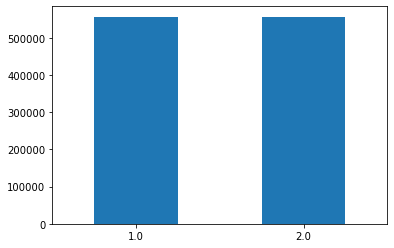

In [143]:
y_res.value_counts().plot(kind='bar',rot=0)
y_res.value_counts()

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=0)

In [145]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=5)
model1

RandomForestClassifier(n_estimators=5)

In [146]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [147]:
y_pred=model1.predict(X_test)

In [148]:
y_pred

array([1., 1., 2., ..., 1., 1., 1.])

In [149]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,y_pred)

array([[110037,   1315],
       [   796, 110448]])

In [156]:
score=accuracy_score(y_test,y_pred)
score

0.9905164513288649

In [157]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         1.0       0.99      0.99      0.99    111352\n         2.0       0.99      0.99      0.99    111244\n\n    accuracy                           0.99    222596\n   macro avg       0.99      0.99      0.99    222596\nweighted avg       0.99      0.99      0.99    222596\n'

In [158]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[110037   1315]
 [   796 110448]]


NameError: name 'all_sample_title' is not defined

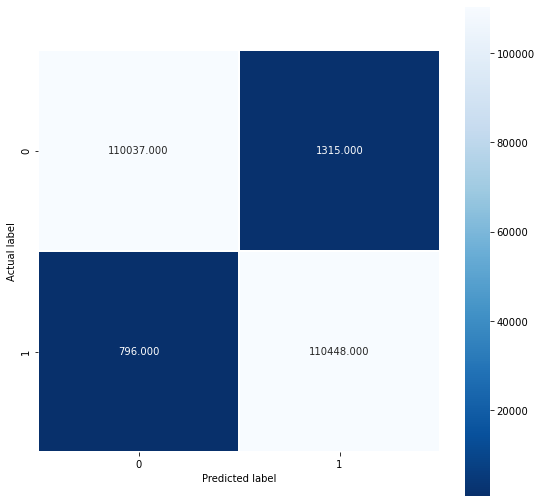

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

plt.title(score, size = 15);